In [2]:
from vqaTools.vqa import VQA
import random
import skimage.io as io
import matplotlib.pyplot as plt
import os

In [3]:
# FOR VALIDATION SET
dataDir		='original_VQA'
versionType ='v2_' # this should be '' when using VQA v2.0 dataset
taskType    ='OpenEnded' # 'OpenEnded' only for v2.0. 'OpenEnded' or 'MultipleChoice' for v1.0
dataType    ='mscoco'  # 'mscoco' only for v1.0. 'mscoco' for real and 'abstract_v002' for abstract for v1.0.
dataSubType = "val2014" #'train2014'
annFile     ='%s/Annotations/%s%s_%s_annotations.json'%(dataDir, versionType, dataType, dataSubType)
quesFile    ='%s/Questions/%s%s_%s_%s_questions.json'%(dataDir, versionType, taskType, dataType, dataSubType)
imgDir 		= '%s/Images/%s/%s/' %(dataDir, dataType, dataSubType)

In [5]:
# initialize VQA api for QA annotations
vqa=VQA(annFile, quesFile)

loading VQA annotations and questions into memory...
0:00:04.056232
creating index...
index created!


Question: What sport is being played?
Answer 1: frisbee
Answer 2: frisbee
Answer 3: frisbee
Answer 4: frisbee
Answer 5: frisbee
Answer 6: frisbee
Answer 7: frisbee
Answer 8: frisbee
Answer 9: frisbee
Answer 10: frisbee
Image filename: COCO_val2014_000000100081.jpg


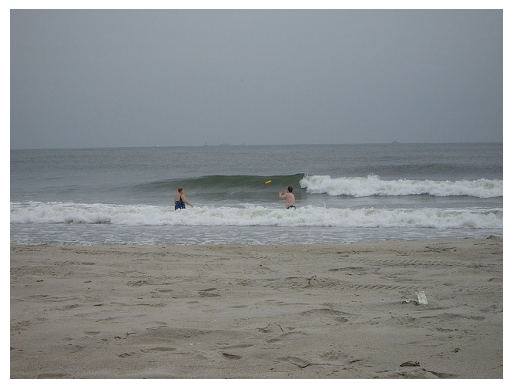

In [6]:
# Finding based on question ID
target_qid = 100081006	
anns = vqa.loadQA([target_qid])
if not anns:
	raise ValueError(f"Question {target_qid} not found")

vqa.showQA(anns)  # prints question + answers
# print("Type of anns:", type(anns[0]))  # list of dicts
ann = anns[0]
assert isinstance(anns[0], dict)
img_id = ann["image_id"] # type: ignore
img_filename = f"COCO_{dataSubType}_{img_id:012d}.jpg"
print(f"Image filename: {img_filename}")
img_path = os.path.join(imgDir, img_filename)
if os.path.isfile(img_path):
    I = io.imread(img_path)
    plt.imshow(I)
    plt.axis("off")
    plt.show()
else:
    print(f"Image not found: {img_path}")

Question: What is he eating?
Answer 1: donut
Answer 2: donut
Answer 3: burger
Answer 4: donut
Answer 5: donut
Answer 6: donut
Answer 7: donut
Answer 8: donut
Answer 9: donut
Answer 10: donut


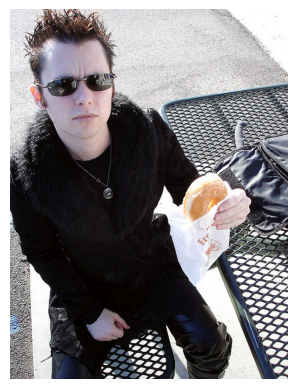

In [7]:
# load and display QA annotations for given question types
"""
All possible quesTypes for abstract and mscoco has been provided in respective text files in ../QuestionTypes/ folder.
"""
annIds = vqa.getQuesIds(quesTypes='what is');   
anns = vqa.loadQA(annIds)
randomAnn = random.choice(anns)  # type: ignore
vqa.showQA([randomAnn])
imgId = randomAnn['image_id']    # type: ignore
imgFilename = 'COCO_' + dataSubType + '_'+ str(imgId).zfill(12) + '.jpg'
if os.path.isfile(imgDir + imgFilename):
	I = io.imread(imgDir + imgFilename)
	plt.imshow(I)
	plt.axis('off')
	plt.show()

Question: Are there personal care products in this picture?
Answer 1: no
Answer 2: no
Answer 3: no
Answer 4: no
Answer 5: no
Answer 6: no
Answer 7: no
Answer 8: no
Answer 9: no
Answer 10: no


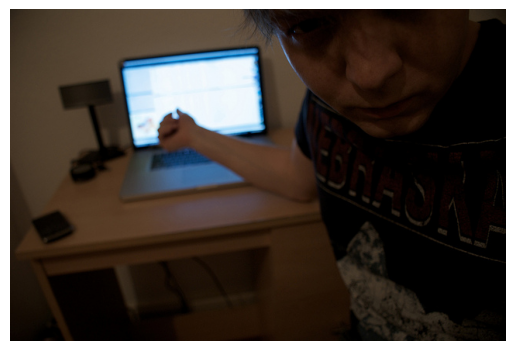

In [9]:
# load and display QA annotations for given answer types
"""
ansTypes can be one of the following
yes/no
number
other
"""
annIds = vqa.getQuesIds(ansTypes='yes/no');   
anns = vqa.loadQA(annIds)
randomAnn = random.choice(anns)  # type: ignore
vqa.showQA([randomAnn])
imgId = randomAnn['image_id']    # type: ignore
imgFilename = 'COCO_' + dataSubType + '_'+ str(imgId).zfill(12) + '.jpg'
if os.path.isfile(imgDir + imgFilename):
	I = io.imread(imgDir + imgFilename)
	plt.imshow(I)
	plt.axis('off')
	plt.show()

Question: What are they eating?
Answer 1: birthday cake
Answer 2: cake
Answer 3: cake
Answer 4: cake
Answer 5: cake
Answer 6: cake
Answer 7: cake
Answer 8: cake
Answer 9: cake
Answer 10: cake


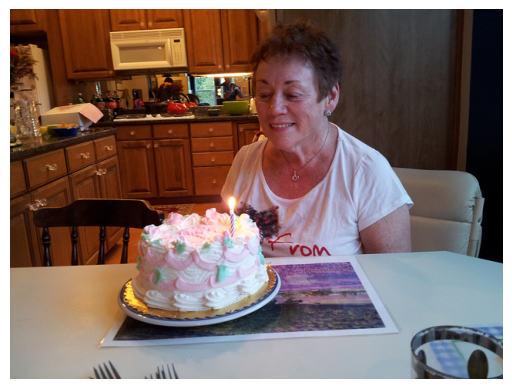

In [8]:
# load and display QA annotations for given images
"""
Usage: vqa.getImgIds(quesIds=[], quesTypes=[], ansTypes=[])
Above method can be used to retrieve imageIds for given question Ids or given question types or given answer types.
"""
ids = vqa.getImgIds()
annIds = vqa.getQuesIds(imgIds=random.sample(ids,5));  
anns = vqa.loadQA(annIds)
randomAnn = random.choice(anns)  # type: ignore
vqa.showQA([randomAnn])  
imgId = randomAnn['image_id']    # type: ignore
imgFilename = 'COCO_' + dataSubType + '_'+ str(imgId).zfill(12) + '.jpg'
if os.path.isfile(imgDir + imgFilename):
	I = io.imread(imgDir + imgFilename)
	plt.imshow(I)
	plt.axis('off')
	plt.show()